In [1]:
#import something
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']= (16,9)
plt.style.use('ggplot')

In [2]:
#importing daata set
data= pd.read_csv('xclara.csv')
print(data.shape)
data.head()

(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


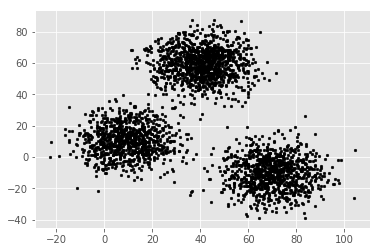

In [3]:
f1= data['V1'].values
f2= data['V2'].values
X = np.array(list(zip(f1,f2)))
plt.scatter(f1,f2, c='black', s=7)

In [4]:
#Euclidean Distance
def dist(a,b, ax=1):
    return np.linalg.norm(a-b, axis=ax)

In [5]:
k=3
C_x = np.random.randint(0, np.max(X)-20, size=k)
C_y = np.random.randint(0, np.max(X)-20, size=k)
C= np.array(list(zip(C_x,C_y)), dtype=np.float32)
C

array([[26., 18.],
       [54., 56.],
       [45., 46.]], dtype=float32)

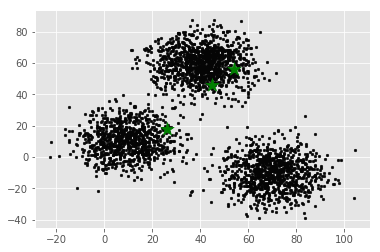

In [6]:
plt.scatter(f1,f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [7]:
C_old=np.zeros((C.shape))
#label
clusters = np.zeros(len(X))
error = dist(C,C_old, None)
while error !=0:
    for i in range(len(X)):
        distance=dist(X[i],C)
        print(distance)
        cluster = np.argmin(distance)
        clusters[i] = cluster
    #storing old centroid
    C_old=deepcopy(C)
    #finding the new centroid
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j]==i]
        C[i]=np.mean(points,axis=0)
    error = dist(C,C_old,None)
clusters
C

[31.99597155 78.77854748 65.32631853]
[ 8.36203996 54.01687137 40.56327615]
[27.10919007 71.90250729 58.52229013]
[15.30704711 59.73803555 46.32429763]
[15.61091724 61.42854819 48.37798066]
[14.14367739 38.27067089 25.08383125]
[13.80516979 60.47678937 47.26820489]
[22.04473048 65.85680616 52.51141428]
[20.29051018 66.8809514  53.71637292]
[31.26561073 78.29555067 64.85760998]
[17.779703   55.34404971 42.28908345]
[25.73483702 67.29699743 54.14020612]
[23.76870409 70.39752983 56.94440863]
[42.04921414 89.03149722 75.58578467]
[22.80052738 69.48524065 56.30683856]
[22.11535985 59.66448683 46.74010318]
[17.18180893 63.7275233  50.27513228]
[30.01668881 75.99365489 62.5558736 ]
[20.494733   53.62444585 40.9214871 ]
[36.02385662 81.21055546 67.82864993]
[ 9.50491342 47.48027316 34.1264601 ]
[28.07437909 75.2297626  61.81709836]
[18.59795722 51.39963826 38.61090743]
[33.01010108 79.90416538 66.45542044]
[21.93945586 66.29520589 52.9187469 ]
[19.81183488 60.12170391 46.96319901]
[38.99150722

[26.56006194 68.57727699 55.39397253]
[17.72410086 64.92325718 51.55985496]
[32.25867621 65.68389677 53.43353406]
[22.06267069 69.14528393 55.71946599]
[15.32148638 43.71258337 30.77589552]
[19.08200513 61.60991647 48.31203736]
[20.73738672 62.75040271 49.50167607]
[14.94637968 60.03249192 47.08109542]
[ 7.68883784 46.45443431 33.04178669]
[25.50833417 69.95073106 56.58595315]
[27.48023841 74.31345183 61.10606437]
[25.7839447  72.59678456 59.39203893]
[ 7.98918471 41.51032103 28.06504218]
[30.68696852 75.01436106 61.67962254]
[32.24112923 78.48858819 65.04237532]
[33.49627048 78.62856725 65.24468716]
[22.24372872 65.28392577 51.98678972]
[31.46184684 78.43416255 64.99074258]
[ 1.63571761 45.57265246 32.21610672]
[16.81000652 58.49380582 45.21021421]
[20.55159211 67.69294645 54.28036531]
[22.69104809 69.22697615 55.77339634]
[17.93702425 64.5708265  51.1195604 ]
[22.32244788 67.81406821 54.38472941]
[23.31152404 68.03192772 54.64192406]
[ 9.67331422 54.247313   40.80360092]
[23.08210763

[45.53401853 14.29363787 15.72537896]
[48.82276774 24.94515765 24.63071599]
[39.51421941 18.43986918 16.58310632]
[45.40557145 23.74352625 21.87882169]
[44.98589751 13.80705524 15.00162306]
[48.52027772 26.44531622 25.49823935]
[17.18379211 30.78898165 17.350681  ]
[38.52826827 33.11326102 26.17650694]
[35.07376445 16.90744784  8.7367381 ]
[53.10494419 18.73087657 23.48497982]
[65.82117131 19.40352835 32.10495277]
[34.15076081 18.18661662  9.4239601 ]
[44.40997272  8.23358468 11.71951862]
[72.99267781 26.13147171 39.18878582]
[48.6116661  19.41846649 20.94920096]
[42.03989762  8.36841153  9.17668521]
[33.12960996 17.88358734  8.08634874]
[46.19201441  2.75325909 12.37042019]
[34.70869227 12.50976094  1.17079411]
[37.96583814  9.7085831   4.28319807]
[37.10336901 21.17484905 17.40568275]
[40.90481294 29.73277454 24.2863917 ]
[46.18454361 12.88559151 15.48976528]
[52.21014867 37.30338784 34.98943561]
[43.99841665 15.4335695  15.19855413]
[38.58612312 22.4553267  16.87515385]
[39.29743801

[26.12696184 22.82804098 11.53013075]
[46.9135117  15.88580561 17.69404363]
[36.04889325 17.55658806 10.37881518]
[32.01616254 20.95708911 11.12090932]
[47.98509005 13.67266714 17.32869836]
[49.6431457  10.57589122 17.33856208]
[43.08635521  4.88147569  9.96277295]
[35.36995214 14.5866773   6.08217023]
[33.32106591 15.91083509  7.89783092]
[61.24259849 28.39164507 33.44366981]
[53.49938665  8.68824791 19.95638724]
[57.45791463 30.79431106 32.92354285]
[35.35368457 15.84287009  7.72203294]
[50.0984599  33.50071708 31.30580369]
[59.45898586 12.25733901 25.67830134]
[49.44818232 17.6860469  20.50053499]
[44.09364151  9.50891275 11.94046572]
[60.8803203  14.34559722 27.10907154]
[50.15351178  5.99543692 16.55764488]
[68.64434824 28.27881018 37.42784292]
[52.15792587 12.70134447 20.10429585]
[55.42494535 10.84847488 22.01364775]
[38.07207982 13.97644381  8.67879839]
[49.01588068 11.7882551  17.29471996]
[50.65261672 14.52385969 19.74599099]
[62.63716757 23.5753507  31.73115568]
[52.67752524

[24.43638773 55.07829069 44.22004235]
[47.08685257 66.3921578  58.81479301]
[33.52911829 43.20950004 35.82071989]
[56.30703694 54.69131815 52.18135472]
[63.00601954 81.2022688  74.58964377]
[53.39813032 70.66691165 63.83836716]
[60.30097864 68.66965196 64.13668249]
[37.51971602 61.83520465 52.78000752]
[42.58379094 58.34137933 51.10821737]
[59.96988853 80.14465902 72.9861219 ]
[48.89914057 69.15277745 61.49190409]
[71.74473116 83.03144976 78.33062268]
[66.05898911 74.54623882 70.27635522]
[60.87637407 63.44580395 60.28768344]
[46.14947008 64.5751469  57.10824176]
[61.58994112 74.82217457 69.25825689]
[58.00335174 71.08063909 65.37774249]
[68.90594275 72.48636422 69.52864301]
[51.78447934 75.01744158 66.89929178]
[54.27657606 63.91035457 58.735721  ]
[48.71996178 67.55843127 60.16445193]
[52.68694004 76.96053282 68.66776311]
[49.32931171 74.72047667 66.07347254]
[37.25426661 52.40482471 44.77467557]
[61.72421468 71.77092864 66.93193377]
[47.63187316 63.90477269 56.94354074]
[50.37972166

[71.53873233 78.53372971 74.85867968]
[36.50418545 70.54820731 59.83030215]
[62.93472331 73.6052123  68.68317595]
[50.05352192 72.94287255 64.81926964]
[52.79830527 79.69872395 70.87647578]
[31.36561365 47.1656718  38.72100717]
[56.05910058 66.14648811 60.98621212]
[61.49731391 68.99257779 64.72483333]
[57.32660205 73.28016828 66.92141887]
[53.20899553 70.29635471 63.49554933]
[41.29565659 70.07736905 60.46134958]
[53.92075571 66.66112895 60.80513459]
[48.72605775 69.32372684 61.58667586]
[31.53767013 57.52629629 47.79655328]
[57.62124616 74.69223955 68.10716401]
[65.59784906 84.49195773 77.81370201]
[51.70001886 68.54402199 61.7126863 ]
[58.7321462  66.20906175 61.78738267]
[51.74244651 61.50503696 56.12973357]
[52.87690666 74.59973685 66.83342007]
[47.32137862 59.32247499 53.16572842]
[48.75810359 75.94686791 66.92595853]
[39.39359765 49.91075783 43.25199403]
[52.5021797  63.3882416  57.83148462]
[64.80571959 80.56597527 74.56685464]
[53.2768453  73.59644995 66.13449558]
[58.14328416

[37.36484072 81.05550378 64.60639231]
[26.6425295  56.55087898 39.9794992 ]
[38.94165355 73.00670875 56.92933879]
[31.71204579 61.34970528 45.03692932]
[15.82458393 66.19648639 49.60248028]
[35.53540752 39.44451571 23.13436295]
[18.34109513 64.7417206  48.08954194]
[36.79024907 66.82607491 50.78350293]
[20.11976303 71.23726191 54.58426719]
[35.34116588 80.9331808  64.4011046 ]
[38.3925909  55.33795294 39.73167257]
[41.84523108 67.3497163  51.76706408]
[32.17600975 72.71435364 56.23642187]
[44.37090219 91.42401838 74.96465317]
[21.88644741 73.76880259 57.10838999]
[41.75786111 59.13972042 43.87327721]
[28.58170628 66.19237058 49.66387904]
[38.62950799 77.63659009 61.36880677]
[42.03661377 52.71780894 37.68191418]
[45.09526473 82.20103437 66.19924587]
[31.81245509 48.97606796 32.63497733]
[31.7178013  78.207473   61.61074033]
[40.49247468 50.78351079 35.53341263]
[37.56337497 82.30146589 65.82508914]
[35.98547787 67.46486362 51.34080618]
[38.43785138 60.34150629 44.63533022]
[51.66832788

[35.97833856 61.72573998 45.74148377]
[44.99810824 68.5835889  53.29935296]
[27.72155721 61.78103895 45.25139759]
[41.03396684 60.95027982 45.52763798]
[48.79007733 58.09179966 43.98400056]
[31.37025982 60.98780748 44.65632141]
[42.04156818 62.71957859 47.35429248]
[39.15456817 69.76414661 53.82425087]
[22.02826334 66.59943291 49.9290498 ]
[43.83415765 78.63063347 62.70418042]
[23.27571686 67.03685592 50.37404957]
[33.42164362 66.78002283 50.49263085]
[27.5531058  65.21701529 48.65905489]
[42.94637857 65.05892798 49.703323  ]
[32.60945758 45.10381189 28.73016275]
[43.47782408 66.54058216 51.17920509]
[29.1158857  62.1593463  45.69040992]
[18.75124384 70.18832632 53.55097591]
[39.23055314 83.38082304 66.94970661]
[28.48866459 75.61543478 58.97737729]
[41.0176163  67.38997083 51.71864671]
[22.06085073 69.88019372 53.20870086]
[36.08885492 60.03430015 44.09378836]
[20.5794185  68.92313459 52.25644841]
[38.78400174 69.01249435 53.06772078]
[30.56410775 59.12580098 42.75601135]
[35.37098812

[57.94698021  8.20255625  8.53179723]
[60.64236858 12.38604695 11.5601333 ]
[53.39253334 19.55665639  8.77153013]
[67.99327987 19.89033738 21.24292798]
[52.40675293 13.28103443  8.38161149]
[60.39646993 12.01976048 18.64697552]
[57.24443559  8.35856638  8.39965645]
[27.4861567  37.92936624 22.47935517]
[34.25226225 32.68555883 20.37737172]
[60.14204168 26.59866132 19.89582895]
[47.09000172 29.02891055 14.8613345 ]
[57.44814664 21.94061698 14.3828294 ]
[65.46853298  8.71839135 15.69313514]
[55.49905628 13.54468037 14.80778691]
[57.10297741 10.6508194   7.2560155 ]
[61.7834545   7.21460356 11.94314271]
[69.67003013 10.05865892 19.8897985 ]
[57.51971085  9.89242948 13.37784475]
[58.73157373 12.09420629  9.39526755]
[67.80272489  2.99407438 18.55507274]
[63.46301104  9.51711921 19.61328108]
[63.88840593  1.48077519 15.3014456 ]
[65.16769301  6.42837587 15.32597342]
[50.63630173 14.73626981  5.75424107]
[72.30156364 17.3731707  23.6804091 ]
[66.21703624 20.58658423 20.22487041]
[64.43110348

[59.1254117  17.6938263  12.71402985]
[66.21271157  2.60252929 16.84178956]
[39.66169622 28.86949486 19.10692625]
[53.06355068 21.47404193 10.42739488]
[65.00877656 10.69661479 21.59393935]
[33.78498231 36.626224   19.97982608]
[67.82987954 12.91776307 18.63128184]
[56.72399159 11.01480966  6.88096781]
[54.54764753 17.50298979  7.9951833 ]
[49.05499305 21.31777158  6.77532217]
[64.83235538  0.55495272 16.11761427]
[59.54644748 13.42351237 10.80270608]
[56.83710728 25.61926413 16.99994652]
[65.67632699 33.10802713 27.88730413]
[56.27323203 19.05989734 11.064021  ]
[56.80039698  8.59254459  9.35176704]
[61.76796989  4.09664745 12.6426695 ]
[66.85613688 16.46912896 18.87579684]
[54.60670598 15.56630241  6.38919698]
[63.3485458   6.57236603 17.69809914]
[55.9623692   9.53225446  9.2861721 ]
[64.0886984   2.02095904 16.04629895]
[69.95121274 17.9076231  21.96199504]
[63.00906717  8.61288748 18.63432494]
[63.88596008 16.15182612 16.1809177 ]
[69.35172626  6.69751804 22.37386739]
[62.82887221

[57.08928839 11.48207976 14.54959063]
[51.76367574 13.66202833  6.79545537]
[66.08182551  0.73644689 17.29570243]
[68.09152339  9.78826627 23.24188014]
[62.3608597  10.29622445 12.79023562]
[71.24965842 18.4305693  23.1862819 ]
[77.24663591 12.87198255 27.49368387]
[81.42339068 17.99045619 31.57568198]
[54.91694055 11.42664896  5.29981994]
[67.93501975  7.84929059 18.0879663 ]
[52.39403937 16.33652799  4.10649613]
[63.62698334  2.57137614 15.76457171]
[51.24216322 14.12616657  5.44057916]
[48.27140805 21.43422603 16.55032709]
[59.49529126  6.28243868 12.37944966]
[72.97795895  9.90285772 23.14665734]
[67.98972777  5.51356853 18.24846137]
[78.22430181 16.17829444 28.43978607]
[53.82992551 26.22139153 15.62983147]
[55.75899702  9.85078023  6.99003849]
[49.56602704 26.77284227 13.64061135]
[72.06022282 16.07091552 23.10949257]
[70.53983438  9.61480745 24.64313223]
[69.8351632  13.43631267 20.54990087]
[47.74257597 17.76836047  3.8652933 ]
[49.97345233 22.97183112  9.60192401]
[53.51077937

[25.61295688 58.90848999 47.74774284]
[52.87393071 93.44461614 84.18509724]
[29.64653753 87.79005978 74.41938919]
[24.14892855 63.10067549 51.49425096]
[37.68155836 84.16789641 73.10249512]
[40.16499104 91.00512197 79.33819179]
[35.25120476 70.28778632 60.52342437]
[36.02785334 82.79316982 71.58704817]
[29.28722886 68.27120063 57.40533911]
[44.33743633 78.2109542  69.49407508]
[46.35194191 78.0645074  69.83573281]
[19.15889051 81.42342427 66.96574759]
[44.64433502 89.6284803  79.18442556]
[34.84303377 73.84609635 63.58960124]
[ 45.78256116 100.87304427  88.55860963]
[ 50.38155737 104.29817709  92.34758719]
[12.68772879 70.62648586 56.50848081]
[24.31470457 63.62000625 52.02527418]
[31.03864406 87.11357781 74.1675331 ]
[34.51596777 79.12301902 68.12488792]
[28.32675798 88.73266365 74.87469042]
[32.29662    95.03936941 80.67784164]
[15.29078312 70.73398921 57.03203027]
[51.10324566 85.2974458  77.04014457]
[21.38198205 63.5943168  51.40346704]
[42.64294409 83.88966809 73.94126352]
[25.95

[32.79601576 71.79792047 61.33415621]
[43.52458167 89.06361509 78.46864617]
[17.93770402 77.29431902 63.30089243]
[ 58.38261914 102.24902633  92.59792636]
[31.33626019 76.46630181 65.15689681]
[10.30854919 71.01921707 56.4835038 ]
[19.57653579 54.09665071 41.35135279]
[29.97401905 77.78171464 66.03024314]
[28.76454185 79.4588185  67.24348301]
[45.65083777 80.79901518 71.99930672]
[59.99628396 94.65413081 86.83328053]
[17.94117854 76.66716019 62.76371311]
[28.14116586 72.16186982 60.69351924]
[28.19744203 82.83044905 70.0091161 ]
[ 42.80073912 103.59890061  89.89773162]
[39.79207069 78.81159161 68.9877977 ]
[30.23967916 77.57093302 65.89995046]
[30.42963255 84.27161364 71.67755873]
[45.40536423 83.96827348 74.62249828]
[45.02285238 81.71133148 72.62988598]
[38.24314353 79.6301838  69.35399219]
[26.83853176 73.10425612 61.27923165]
[26.14904775 75.37268632 63.16244388]
[43.45034273 96.93151578 84.88364918]
[35.9971207  82.50438624 71.33487667]
[33.3301089  76.6886786  65.76309724]
[36.03

[53.61535135 71.28421992 52.42206399]
[34.8099347  49.84880916 29.90362996]
[37.17625836 74.77025933 54.82151268]
[19.83701148 60.1804182  40.92881974]
[38.6076071  79.63546682 59.68595939]
[43.11279441 67.51816229 47.848963  ]
[39.72467216 65.14667776 45.33614421]
[44.90873329 78.90459391 59.07338957]
[32.21658853 61.47905219 41.53132574]
[37.75377221 65.93220563 46.04155686]
[44.09033677 56.25927584 36.91366927]
[46.11589601 85.52514518 65.61546182]
[47.03303238 64.93889514 45.65716927]
[29.1304563  61.45040469 41.55779377]
[38.55035044 66.76737948 46.89401238]
[53.93722161 56.639906   38.77623555]
[37.5380618  67.22859199 47.32263847]
[48.3120164  51.21520625 32.57904832]
[51.27575574 77.28161173 57.87772765]
[21.64793776 88.41776979 71.01073708]
[42.11115434 67.36714376 47.6421432 ]
[40.19435642 56.35660909 36.66339447]
[56.13715335 86.32044681 66.87289406]
[14.82119804 55.01976122 37.15003132]
[43.72949509 72.67956401 52.93010786]
[53.81320695 65.71780666 47.22542046]
[57.83283896

[68.82362324  4.64298397 19.59459963]
[50.77067583 16.62452     7.7991804 ]
[61.33606526  8.34903472 11.97590733]
[64.74134243  3.5471693  16.5490338 ]
[75.10934032 13.34928717 24.47227706]
[45.97844322 21.39501488  8.66186627]
[58.90514386 21.21728154 10.38932114]
[61.67937941  5.79367074 14.37966809]
[62.41445977  5.68698704 14.26556439]
[68.62080425 12.31938986 17.86638457]
[43.63099086 31.80394494 28.24874773]
[65.23580405 12.66879614 14.46758621]
[61.7352291   6.1397866  13.83209893]
[68.76018903 14.0187993  18.00470632]
[36.35905964 33.91840217 14.94067527]
[61.18705137 24.79175444 14.6072639 ]
[52.45798652 16.01195781  4.90381255]
[70.36703033  4.42293957 21.48982394]
[77.90809941 18.16794423 36.74892119]
[51.98526246 16.99463615  3.60887971]
[59.11258545  8.5410143  15.31376129]
[84.23577258 25.36909034 44.14917703]
[66.82366786  6.72905868 16.93951735]
[56.57047904 10.95045553 13.7599739 ]
[50.54146618 17.95154834  4.04823985]
[58.69046431 12.02068793 19.49395314]
[47.75000272

[57.37878723 19.2244384  25.46165364]
[56.12672695 23.93179501 28.97057705]
[59.61021362 24.47479186 13.11626689]
[62.62634151  5.66292388 14.31531135]
[48.96199945 18.49814727  7.35016174]
[46.98008601 27.17085422 25.24230052]
[43.26327486 24.14608011 13.76040378]
[57.55770448 27.58343573 33.23605179]
[64.27673626 10.49469195 13.69654555]
[66.47464728  4.52133596 21.75081055]
[52.76951007 14.91417671  7.12279675]
[60.7401139  16.07664059 10.18572678]
[67.26143402  0.11192245 19.9193371 ]
[39.94662813 30.49480975 23.07475271]
[54.75672617 20.3979059   5.56383694]
[65.51812883 13.14688428 26.76824245]
[35.70692435 36.59641942 17.06080773]
[69.26031464 10.50220428 18.65677608]
[57.97096431 10.56169424  9.41454265]
[56.08293961 16.51225032  5.32115246]
[50.62358692 20.79790579  1.11540206]
[65.7905161   2.58104996 19.85872878]
[60.99099136 11.9527664  10.39230392]
[58.73797316 24.04936893 12.09610001]
[67.78916042 31.03248673 23.24227958]
[57.91265515 17.72596343  7.62272509]
[57.73164859

[31.68825519 92.3549522  79.0330064 ]
[25.17440631 81.36763103 68.84833653]
[18.66744849 68.38270941 56.08703919]
[23.02030019 71.92802469 60.38973527]
[35.26949109 96.82046083 83.32038267]
[42.60540562 76.04445359 69.34845552]
[25.26168884 78.23026461 66.33365994]
[31.26990279 88.954481   76.44289351]
[42.99485192 71.56038287 65.71950044]
[26.68024854 67.76148045 57.67154367]
[34.27831486 87.85288304 76.49564643]
[14.30027657 63.19515032 49.97678245]
[34.21235265 77.37030584 68.05860189]
[27.03536057 75.00590543 64.1084414 ]
[21.77707505 84.67081221 70.33747591]
[38.46037273 88.35696812 78.09066494]
[50.46381025 96.62585508 87.93512245]
[22.10396556 60.16469111 49.16550294]
[53.07819616 88.48898943 82.41070423]
[37.75908272 98.38284567 85.25464319]
[37.01198388 83.29824289 73.68294585]
[ 54.77761525 106.50063805  96.55268004]
[21.4193365  76.93820357 64.24585073]
[39.01428837 76.31164898 68.53264692]
[44.85206104 96.75134652 86.35552977]
[25.57264448 65.30676318 55.11791733]
[28.77532

[28.65599478 80.85249648 69.39301956]
[38.40504468 79.58663318 71.06377455]
[31.74285279 74.48798384 64.95134369]
[28.35103947 86.3669066  73.6282088 ]
[27.31933031 71.93681777 61.54548133]
[23.78212412 86.79743985 72.493128  ]
[23.51636995 62.20721184 51.59579306]
[31.80472116 76.30260001 66.50006951]
[40.9496054  93.34481243 82.63514583]
[29.0310248  85.55414393 73.20870042]
[35.11721407 85.52120274 74.91817796]
[40.61919318 79.2419434  71.41000154]
[21.39465863 86.31722471 71.27873866]
[28.27373417 78.38534018 67.27264743]
[25.93206189 58.1935698  48.40880889]
[46.19086094 84.21775497 77.03147518]
[31.40895618 70.03354588 61.01955742]
[16.93595964 66.51577121 53.90539915]
[35.43021426 86.55885656 75.82169908]
[38.35601182 92.91149975 81.53354215]
[11.94357445 75.99810127 60.93013916]
[29.02338753 89.92940839 76.4447296 ]
[45.79783041 78.47750715 72.28065079]
[37.83508777 71.95520749 64.52661101]
[40.23127039 59.2924599  54.19800722]
[45.96282327 83.46623866 76.36436679]
[25.7234092 

[22.95851893 78.44718133 65.89474947]
[21.79022961 76.29776041 63.81079769]
[26.52766048 72.10306613 61.47587171]
[34.39947851 80.52346327 70.70834092]
[11.40561763 73.88408551 59.122298  ]
[31.3208223  96.62013479 81.56217515]
[12.55363225 65.79186015 52.10911394]
[24.26791814 71.81918112 60.62354151]
[37.05734769 92.11952639 80.55100622]
[21.67329169 68.41905059 56.90429018]
[26.00063073 73.66406337 62.68483816]
[18.33192432 72.26877024 59.48255234]
[27.21497172 49.20488091 39.34319274]
[33.2509465  70.97753278 62.36493574]
[24.69695477 86.10029622 72.30965282]
[38.05515695 70.41202538 63.2729249 ]
[42.09697458 88.33706705 79.11857798]
[ 56.27865831 112.14537482 101.01885496]
[34.25735448 83.21683128 72.84591701]
[20.32139557 73.73533772 61.25943706]
[34.42680918 92.43072781 79.97295244]
[37.80974507 96.68359994 84.10139537]
[21.94449744 84.38773019 70.19341641]
[29.74632175 70.76741908 61.19335994]
[35.34272379 67.2520242  59.72581183]
[27.44627669 86.04353524 73.1151456 ]
[24.52583

[38.32979856 85.10207166 59.46785854]
[48.52231556 67.62168925 41.23821677]
[47.72326259 55.83786632 29.64518549]
[37.84487273 44.57994653 18.45657718]
[37.74703211 64.64047193 38.31692803]
[31.09634881 59.91423955 34.22654818]
[38.8718733  61.31121644 34.89957766]
[39.38407569 46.36358511 19.98327899]
[49.17126841 58.04123634 31.94373341]
[35.55640131 57.12227367 30.92369531]
[34.16979363 69.61716251 43.68136079]
[50.65177598 78.96231233 52.48347718]
[55.91192937 85.40744434 58.96020819]
[26.02579896 59.68894897 34.88547449]
[32.28905661 54.32221272 28.58329203]
[19.05333034 68.63309094 45.1817381 ]
[35.01376301 67.44556367 41.37651173]
[44.75794019 62.96167406 36.4954857 ]
[41.61350314 77.26648215 50.96515727]
[29.6719441  63.66160703 38.16940594]
[39.28383523 68.77623051 42.42267949]
[35.61479367 59.38024392 33.17297522]
[44.41788116 55.83153144 29.40195422]
[33.61695019 74.10436037 48.38444887]
[63.06400786 89.89966118 63.6405224 ]
[41.55633856 72.81145495 46.41640489]
[ 9.99483886

[76.39155983  9.12303293 33.29863963]
[54.64983299 12.74687652 18.65024878]
[56.25417017 16.8768876   9.78831341]
[51.6040404  15.78344967 16.99720203]
[54.86383755 16.00467252 26.42018243]
[72.81813257  5.78886059 32.07111918]
[61.56428418  5.84231181 22.53972313]
[70.22056182  9.60553815 34.5212708 ]
[55.71934652 16.81895906 28.47992067]
[62.77049793  4.61649044 23.05483818]
[55.9766336  12.87598596 14.25661084]
[65.05464126 17.6961958  16.24861538]
[52.41599878 24.3784709   3.15514285]
[64.04074759 20.38483985 14.81345934]
[72.06605812  4.8225135  30.97021487]
[76.23342161 11.86043086 30.29395573]
[49.27397389 26.09018697  0.51595934]
[51.46737267 16.60875273 13.10592407]
[81.7437211  14.7926575  37.24204922]
[52.99218522 18.6638923  27.36698711]
[63.90803907 15.91226513 35.0168069 ]
[50.51045021 17.31221964 20.05993625]
[72.70979144  5.68732656 31.98159904]
[63.58747792  8.34979028 28.83919769]
[66.96558177 14.16507306 35.80040113]
[65.76338918 13.24692551 18.26449419]
[47.2222465 

[65.78972899 16.19637993 36.52270611]
[67.43458536  1.47243129 27.44776294]
[62.86255455 15.71824903 34.09081479]
[68.34483822  7.52675663 23.14551112]
[57.59645802 10.46631902 22.59753307]
[79.23248543 16.23158709 42.58238556]
[56.96577238 22.47037067  7.68081898]
[59.48051647 15.3992924  30.96565914]
[59.38594918 18.48130205 33.6254722 ]
[37.66008322 31.57852727 12.86426281]
[78.36074853 14.00031888 32.0315812 ]
[63.46493991  5.26754485 21.22853612]
[50.92368684 29.60695337  4.57057979]
[51.93457764 16.75190947 22.5954295 ]
[65.45594973 21.79038544 16.13848661]
[58.46649392  9.43224187 17.96112191]
[56.07616086 16.82360527 28.89118529]
[71.9204385   4.74345393 30.98092502]
[50.89024065 16.57325917 15.57650373]
[59.7109871  18.60618908 33.99892291]
[55.3736248  12.31218693 20.73910682]
[66.99569993 31.51520885 19.31134952]
[59.93810992 10.50380402 26.69260181]
[49.86930447 17.69094179 18.75961827]
[74.22752537 11.04183842 28.08639809]
[55.47541458 23.03814483  6.19125896]
[82.86090555

[63.99932537 10.95190206 17.78103833]
[60.25670121 16.91936455 12.12668788]
[64.67234405  2.75652092 24.09917045]
[78.00456616 19.62298787 29.47276502]
[73.15223377 30.21343912 24.40315777]
[63.11849448  8.03624286 18.9449783 ]
[60.68786998 21.23060176 11.42162338]
[47.93501759 19.60354178 14.35662112]
[57.15398053 15.22640115 28.38441031]
[63.96423159  3.88415416 22.6854203 ]
[63.69236355  5.35370749 26.35968424]
[57.68792889 11.27114864 15.51548816]
[66.96285853  9.7095633  20.83208785]
[48.83318676 18.63995318 18.01310869]
[53.50234353 14.84449552 22.07959502]
[58.43490484 19.27250123 33.53445894]
[66.90286812  4.21291355 28.81266528]
[79.86662444 16.18431101 42.62646347]
[68.83734296  7.60207281 32.38824546]
[73.9397815   6.66571014 31.25930156]
[69.67286601  8.93004434 33.76609109]
[46.633649   20.76271734 16.86693359]
[54.18112549 13.27076987 16.97913769]
[55.83470127 13.66550994 24.64161352]
[71.05058462  7.28951406 26.15452258]
[68.24272254  2.87568551 28.87365725]
[58.72166451

[32.44084956 84.74872761 74.63824996]
[34.91697653 91.50740079 80.04027731]
[30.76263331 71.01662767 63.81745938]
[30.79402802 83.35172343 73.01339979]
[24.81816249 68.84919824 59.7178745 ]
[39.55244095 79.08545881 73.43670688]
[41.6440498  78.9955974  74.19254724]
[14.85806925 81.41666758 64.17854715]
[39.39154879 90.30350136 81.21277728]
[30.0430343  74.51912017 66.28025893]
[ 40.78179614 101.28491993  88.29785072]
[ 45.33780571 104.77124261  92.45117733]
[ 7.42583769 70.67663449 54.64849451]
[20.35466758 64.08239379 53.79574247]
[25.93719777 87.40472903 73.42820904]
[29.37962089 79.70504773 69.88517528]
[23.7482832  88.85763231 72.83243602]
[28.43013527 95.06609512 77.72037939]
[10.09267977 70.86517687 55.79951638]
[46.1436145  86.23816615 81.17164414]
[17.41778687 63.96692466 52.49796619]
[37.51081666 84.62170085 76.60398232]
[20.69038239 79.84896408 66.45859604]
[30.93511654 82.26867952 72.32216743]
[29.11919466 69.45157588 61.9073616 ]
[30.77658431 90.50412052 77.52493147]
[27.50

[23.55677271 73.24721256 62.77949333]
[ 8.67482577 72.52377785 56.47573483]
[39.61952366 79.86808045 74.03763999]
[20.5258849  77.27945325 64.62591333]
[19.40340548 75.13003354 62.61787657]
[24.43944078 70.94136724 61.28596596]
[32.10099766 79.3706278  70.71721274]
[ 8.93663189 72.72869228 56.72490139]
[29.33519975 95.46418496 78.65989721]
[10.85716774 64.62874643 50.52927062]
[22.15313785 70.65425558 60.17096123]
[34.58779316 90.95510486 79.55702542]
[19.74271964 67.25249965 56.38216891]
[23.81884535 72.50051914 62.29332544]
[16.06622443 71.10133828 58.22142445]
[26.95294746 48.04101398 40.3302037 ]
[31.34090275 69.83515534 63.09889424]
[22.29733627 84.93514769 70.25470795]
[36.25157455 69.29133712 64.62662365]
[39.71563596 87.19322055 79.26505932]
[ 53.84662366 110.98574331 100.0223173 ]
[31.87703738 82.05940576 72.55390841]
[18.01696841 72.56761075 60.12643229]
[31.97899045 91.26330669 78.53300512]
[35.3929988  95.51609141 82.54589923]
[19.57535338 83.22522235 67.93974466]
[27.78926

[28.99153339 66.55001499 31.41554307]
[51.33826565 60.21077225 18.6447841 ]
[32.72377976 62.88128948 26.2215867 ]
[45.77944048 60.17771977 19.02710782]
[51.3376842  79.82510837 38.72144409]
[42.39831886 57.80180533 17.47572105]
[39.86477512 63.38093994 23.81735423]
[51.17966122 52.39242951 10.95560824]
[28.96193598 61.31660288 26.77178314]
[48.33844319 67.49973612 26.18231663]
[43.76594714 69.24359342 28.80350955]
[29.9162134  61.08385748 26.06113597]
[49.60286841 44.21710729  2.67166308]
[32.94424968 59.13674596 22.82474069]
[40.77648333 53.04344629 13.71362628]
[41.50279246 59.54360133 19.46922905]
[52.77668049 74.23384135 32.74054027]
[25.31044567 48.88526126 24.35494626]
[52.46207385 62.18615345 20.64318149]
[23.76604267 79.50611447 47.70142158]
[41.69466075 65.08378994 24.99329371]
[49.13606949 61.40436453 19.87606424]
[38.96044871 67.31883394 28.12367824]
[33.79704732 63.88064547 26.66801353]
[42.75730197 60.6667833  20.21181509]
[47.84331466 46.47575988  5.02617116]
[23.60581355

[70.32344111  8.50929688 37.01841129]
[57.9261728  28.88863774 55.37749685]
[61.8830709   9.03212701 32.61954527]
[79.75528397 11.14249952 50.29259779]
[57.93638167 10.68620169 35.05476412]
[60.78470971 14.77664929 26.97248255]
[54.97701226 13.67156765 32.79944037]
[57.13883503 14.82625668 41.83383353]
[75.8847088   8.07585962 49.3150103 ]
[64.81548793  3.91334544 39.68402335]
[72.61062091 11.06683147 51.64662166]
[57.75898618 15.87516248 43.81923479]
[66.0593898   2.63121525 40.26642681]
[59.89316104 10.59444441 31.38434505]
[69.86583064 16.43993503 31.33580925]
[57.57145648 22.27496831 19.58401253]
[69.06685566 19.01245728 29.00268422]
[75.21113535  7.09841615 48.20666965]
[80.14459821 12.94764452 46.62136875]
[54.4539243  23.90052008 17.680922  ]
[55.31254592 14.34114239 29.38131761]
[85.26237479 16.68161357 53.83002545]
[55.04561233 17.47131138 42.13645379]
[65.62518389 16.15538994 51.22818867]
[53.46111822 15.43180045 35.10252912]
[75.7766536   7.97434147 49.22696185]
[66.14277576

[64.62296541 15.80851228 50.22638504]
[72.28114814  7.1902021  40.00384483]
[60.54031805  8.85033811 39.14855751]
[81.46126482 18.30977447 59.83876275]
[62.09142364 20.57031944 22.82065391]
[61.41813757 14.95765736 46.83405063]
[60.94498634 18.15906607 49.09979984]
[42.3429352  29.30898712 19.64490738]
[82.32140274 15.1661983  48.1173108 ]
[67.08491803  3.19334393 38.49573402]
[56.53309407 27.5262728  14.72772689]
[54.59426236 15.1046672  37.73417714]
[70.5816033  20.53745236 29.48236041]
[62.0813264   7.15165235 35.10566048]
[58.07965305 15.93740555 44.26110521]
[75.04510229  7.02732299 48.22471244]
[54.42068965 14.39594783 31.34336158]
[61.2408269  18.32959795 49.49277494]
[58.42926329 10.46343334 37.04696551]
[72.77532966 30.24088927 26.71766312]
[62.49490192  9.6802457  43.2013397 ]
[52.97478494 15.71368421 33.76147864]
[78.21760917 11.78122341 44.42178649]
[60.61262805 21.06044374 21.69016692]
[87.03599037 20.60364735 50.71068619]
[52.80815119 15.92190904 31.04806601]
[56.47412285

[72.95160221 10.96027429 51.70206307]
[54.55894721 26.89877559 14.76584138]
[67.68589576  3.02072844 43.00499721]
[50.75981327 18.99823602 36.91468202]
[53.12293834 15.64536068 34.37156058]
[83.83210853 15.27747228 54.22575117]
[60.81944247 11.06594161 30.54668279]
[83.83952499 32.22443105 38.45393893]
[72.49570506  3.92501394 43.94369115]
[59.37469621 11.43626365 30.51228996]
[79.27981644 16.79592316 41.6431955 ]
[68.30992191 16.04920486 52.94874847]
[69.28603384  0.74050467 42.27934071]
[62.23820428  9.13416482 32.45850092]
[70.27595897  6.06016323 46.87853856]
[67.42334773  1.55561127 40.03391383]
[67.26219896 10.00996578 47.85311206]
[62.18314211  6.44909123 37.63718248]
[67.11592503  4.36499119 43.51714771]
[74.37912108  9.6777538  40.63929285]
[68.44902998 21.08608055 27.18183089]
[59.57606042 10.09234062 39.28579122]
[57.8475109  10.82646548 35.7288019 ]
[70.20809275  1.98925356 43.55035767]
[68.23331622  9.51126498 34.59566657]
[64.95723908 15.15553328 28.4400879 ]
[68.00024676

[31.44849675 84.43801999 77.59059326]
[29.24611379 86.62939906 77.05846836]
[24.12217205 82.3492355  71.86195358]
[14.97900483 79.16818019 64.14095381]
[11.81327401 57.13159521 42.66088387]
[18.92430431 76.23864471 65.63941341]
[11.89655275 72.79436689 59.3603726 ]
[12.76561516 74.22833823 60.6706558 ]
[16.00114006 82.98742171 65.32333222]
[ 5.3952041  69.17768107 53.10913816]
[19.12925583 57.69693493 51.509711  ]
[40.47780063 92.82241791 87.08744839]
[18.57247791 86.0651839  67.59068   ]
[15.85732204 61.79543349 53.29242861]
[25.23072141 83.06994397 72.90866465]
[27.81993273 89.76367276 76.9509305 ]
[24.80143675 69.47296639 65.04044671]
[23.59104379 81.65532013 71.2146865 ]
[19.02730452 67.17555141 59.90670263]
[33.00270985 77.67755373 75.01328121]
[35.20447412 77.64613381 76.29558453]
[10.95700122 79.35219743 57.16795855]
[32.17196564 88.70263145 79.86347652]
[23.54391949 72.9233394  66.54614332]
[34.2689145  99.47106627 83.6170598 ]
[ 38.71326068 103.00170824  88.12579273]
[ 0.22352

[34.46382251 84.23977275 79.3932226 ]
[ 9.27606818 71.62370725 57.05142104]
[17.10050078 66.65257784 58.32203182]
[32.70400828 91.08510112 81.06977434]
[ 8.89398318 67.84105249 54.20929242]
[13.04762962 74.98963751 61.22204257]
[28.29290254 65.46841168 64.30605892]
[33.57968259 89.34083681 81.07338591]
[14.7568984  83.20462259 60.53180619]
[10.7886292  77.16046523 60.21246003]
[29.62505468 91.03968778 78.69622163]
[38.40574586 74.87807824 76.51472286]
[ 8.98579207 69.91145067 45.26963025]
[13.57530014 77.94020745 62.71029542]
[27.08428558 86.30869328 75.41824486]
[15.33133115 80.65774378 64.72362142]
[34.09767484 90.17029882 81.74307543]
[29.73410648 85.50908779 76.94356365]
[38.68175215 94.75686433 86.58708128]
[26.63420267 81.23277177 73.01317761]
[ 4.21261411 71.99756773 50.71420063]
[19.20374581 74.61038979 64.92803319]
[31.12347155 86.82388263 78.41465307]
[21.9315525  63.58044672 58.89641271]
[35.6298246  90.92108929 83.07932142]
[35.11606608 81.14604346 78.19776654]
[32.38000886

[54.52182838 65.56701363 13.26279846]
[70.20475115 79.9002375  22.97960428]
[60.21848684 68.44295849 12.77732841]
[61.6399061  42.16140349 14.79825511]
[69.52455173 51.40823898 10.27435292]
[57.0852995  37.3468372  20.25691784]
[75.11262311 80.34621858 23.71203486]
[72.06811594 53.95707167 11.24038106]
[71.20524146 92.83678131 36.63862221]
[75.28693082 62.32620456 12.91932985]
[59.01059879 48.9835296   8.29347771]
[54.13699899 44.29820805 14.80726086]
[75.94575165 56.25506738 14.42211311]
[41.43202584 56.97364791 21.02024753]
[50.75704946 51.48200672 12.52167196]
[72.53020864 71.47789994 15.50143368]
[57.85381782 59.33006083  5.69396115]
[90.49099251 87.72229467 34.44130339]
[51.7695768  61.90487535 12.73488896]
[74.75858033 78.65861671 22.13919961]
[66.64321816 47.48732374 11.27686913]
[59.42823064 56.39974191  3.00316543]
[70.03825875 74.34171764 17.48160776]
[49.98946097 53.84549952 12.58805511]
[56.9028954  53.05784532  6.33072528]
[55.72566815 57.51363166  6.93447492]
[60.04750937

[75.60115676  3.44461617 54.72684522]
[77.69890876  3.10695116 59.44587135]
[89.95798667 15.59914874 64.33843859]
[60.39496095 15.66350363 44.69886596]
[77.37574626 16.74917476 44.97870118]
[74.54440098  0.66250166 57.34690789]
[75.68006156  1.00838596 57.21448813]
[84.29568094 11.68900565 57.68408862]
[48.75896144 28.61954948 56.40084961]
[81.22453394 10.33673826 54.50748942]
[74.95228154  0.3909499  56.8024387 ]
[84.91092006 13.10143909 56.91978125]
[55.76920081 27.87232679 31.08591736]
[80.65429803 20.83664209 44.49718125]
[67.51600295  9.95188895 47.33009076]
[83.18851113  8.75104961 63.98485751]
[84.57456644 23.22403464 79.3353766 ]
[67.51832095 10.93213369 46.17522886]
[70.69706378  5.34511044 57.57943656]
[89.40595683 30.5889831  86.69249396]
[80.96986438  6.61690202 59.00761826]
[68.37566941  6.78620488 55.47450755]
[65.91798429 11.8998121  45.58432301]
[68.23019504 10.68073393 60.38013913]
[59.85460511 14.88308877 49.44756804]
[63.37467889 11.41803029 52.19034431]
[45.8608412 

[96.29946174 23.43582052 78.36509608]
[66.68791133  8.44080324 50.54874022]
[60.50902372 14.546676   47.49783188]
[91.13272232 16.64670827 69.91965481]
[84.46608264 17.98522761 74.78025598]
[67.13376764  9.25694994 48.4669186 ]
[68.48948027  9.97338161 47.03850477]
[75.40617364  1.16918788 58.10580655]
[77.45937896  6.06916908 54.16237142]
[77.33998037  7.75912251 52.54736474]
[68.35673871 13.68318977 43.27618624]
[64.43888644 11.05029587 54.99569751]
[82.21878079  7.77462078 63.2287174 ]
[66.47147603 10.73552651 58.23410306]
[91.35239145 18.72193558 74.42389719]
[89.24484955 18.68982124 57.40858212]
[74.46794731 13.30655797 67.4632307 ]
[80.87327667  6.52209542 62.44270716]
[86.94259615 12.21742691 65.07162226]
[76.66718809 15.27411521 45.65195762]
[59.80204908 17.20432368 42.57080847]
[66.54147242  8.78535067 55.25263319]
[72.94946524  4.5224474  52.49783292]
[95.13954138 20.65176866 73.08132209]
[77.2272092   2.81035332 57.37367188]
[70.29419118 11.13885495 62.80701064]
[61.5815781 

[68.81110787  7.22859923 57.14313631]
[90.16386486 18.00156056 74.08940244]
[69.4655361 13.997716  64.5929632]
[70.16897988  8.95952711 47.98226582]
[72.58873846  2.80902263 57.21131525]
[81.79179052  8.51045908 57.52168698]
[95.93668226 24.64931707 62.13105676]
[95.80893393 21.10097245 70.52016659]
[74.63875156  3.2024642  54.26348873]
[66.15323686  8.58263916 52.67655811]
[84.61485649  9.99580743 64.34267518]
[79.56872826 10.78169377 67.50750241]
[79.44238244 18.86886936 44.99821649]
[61.26511647 13.47337877 49.97416997]
[76.81172648  3.08859911 60.00873592]
[80.85951908  9.53606282 66.46846473]
[78.82530333  8.26028937 65.11960089]
[86.19412648 20.4332772  77.24002573]
[74.67188187  7.93396836 50.37764662]
[78.01190606  4.38754882 56.54584151]
[74.22552636  7.12774008 62.40147823]
[70.20872947 13.52453757 64.78521723]
[60.76190816 20.67270411 62.55165806]
[79.51148813 11.7531997  68.33692507]
[67.61731023  7.61251241 55.37665089]
[70.27840764  7.98785271 59.90721503]
[77.82461335  5

[11.75687903 83.86247744 63.56360131]
[19.61524469 94.19564005 78.46900268]
[14.24805197 60.794894   56.39278789]
[28.80576438 94.32585172 91.09984312]
[11.41238732 77.70300688 56.28477047]
[15.57372213 61.80819449 47.81818829]
[ 3.84382753 78.52536765 65.47949299]
[ 4.86097056 70.34200666 61.1593079 ]
[ 9.60130857 77.4125976  70.96257694]
[17.55981951 66.08700416 68.41044336]
[20.28710882 92.69634797 82.0522675 ]
[ 7.87568948 77.22141444 58.585445  ]
[ 9.69379338 83.251658   65.10361894]
[ 9.3120871  72.7323137  67.84210978]
[23.37482025 51.72835822 53.2367843 ]
[18.37785539 61.4123975  44.41420682]
[11.75222949 69.59404691 66.99763011]
[15.28313244 88.20883872 77.16019925]
[18.78479343 93.43944296 77.37473895]
[10.53316338 77.4025735  56.68577398]
[15.22015123 89.70763767 75.1772204 ]
[22.98582738 65.64053651 40.02621212]
[22.16790003 55.14899225 59.32404298]
[12.27319083 62.73203654 53.13357633]
[11.35262314 65.02896696 51.83525205]
[14.5821088  80.28919385 75.92827627]
[ 4.53170044

[ 5.65320191 79.42281372 63.35687847]
[ 3.80962303 72.47169622 58.63346761]
[21.1122315  92.90722177 83.10292274]
[ 8.85696186 82.8658831  65.62182131]
[ 2.60925269 72.14456125 60.9898598 ]
[23.01445634 88.71515815 85.12020625]
[23.93750585 74.20912852 43.84117434]
[13.90087224 82.94584251 76.16108322]
[ 8.55048369 79.62966978 60.6756308 ]
[16.51800108 85.66698925 61.41176603]
[21.78955297 53.52632985 46.84002667]
[ 9.76021624 75.29175745 69.94763172]
[14.9831973  78.75977589 75.57368433]
[ 7.56104006 81.5370091  69.54411698]
[ 3.57470504 78.18155955 65.47330675]
[16.03478405 75.16473572 50.63325368]
[ 6.17984288 75.29496081 67.34016624]
[ 4.61966941 76.37754631 60.34207149]
[18.54947099 62.5137913  43.97482072]
[ 8.27015562 82.76660418 69.46922992]
[17.80192722 92.5042132  76.1749081 ]
[ 1.87679086 76.39984272 64.19270708]
[13.53008373 75.86275529 73.00404722]
[ 9.57816542 70.47630681 66.06934247]
[ 8.52589533 81.63029903 63.61383276]
[ 8.49046758 67.69782353 61.56095236]
[14.87414449

[20.07343082 94.73038998 78.41604584]
[25.36399572 98.77048283 75.16343618]
[19.81360352 72.10404316 75.03305693]
[13.79710834 74.9215806  52.16090144]
[14.10821314 61.8628534  59.08845793]
[31.91657528 65.11997903 78.54917113]
[10.90826641 63.9874145  54.36268369]
[ 5.05906476 70.00364064 60.73300298]
[16.41857068 68.43758304 46.62241572]
[16.84743047 77.46158254 76.2682787 ]
[ 4.41407372 73.72462317 58.53768602]
[ 5.13974001 71.58118781 57.29710221]
[ 7.89460269 67.80752262 60.90207394]
[ 8.30718153 76.47488546 69.54865841]
[16.20488033 68.65001362 46.87567568]
[24.47897041 91.37976082 62.25769597]
[16.98951312 60.75514516 46.48213807]
[ 7.4745587  67.38477955 58.82620277]
[12.98865509 87.68314065 72.42457877]
[10.84472298 63.88866212 55.59176616]
[ 5.96571947 69.29210971 60.7843911 ]
[ 9.14100013 67.46451083 53.5578348 ]
[30.06502614 44.88211473 50.60077731]
[14.00969007 67.17701047 66.48403188]
[12.18826682 81.11935376 59.31106953]
[19.04793323 66.98966724 70.44686487]
[15.18076848

[66.7495654  61.15892728  3.69118881]
[59.95826273 55.10792997  4.59119086]
[75.85035953 61.96547839 11.92236205]
[69.22577615 78.10542307 20.09805981]
[73.83316998 69.56886626 13.09784306]
[70.09473345 66.12726911  8.89990601]
[64.85603844 52.78614806  5.71615247]
[68.13275813 34.14958993 24.94371645]
[78.97439544 52.01478777 18.76394245]
[71.76838957 69.17745822 11.91212482]
[59.92873541 51.57590686  7.18597013]
[69.83956311 48.83763698 12.3727692 ]
[64.10632639 51.11962456  7.15972018]
[54.00517334 57.19129989  9.94185547]
[65.49418294 64.01831651  5.90832594]
[50.58757579 57.36290069 13.37462451]
[62.51676074 72.72085622 15.85398183]
[70.16023744 54.08140025  8.51322481]
[51.09575836 54.39584267 13.04971831]
[70.78100713 51.58935438 10.88794231]
[69.56674601 76.05809132 17.9627158 ]
[63.20772087 79.12714923 22.61962939]
[75.49439586 61.68429594 11.56739247]
[73.80865839 49.94913894 14.8638322 ]
[61.91584396 38.558074   19.55938304]
[64.72953463 58.61775599  0.86441496]
[57.85495695

[69.60633724  8.36338547 59.57267163]
[88.87760678 18.05108632 76.04339726]
[82.33367261  9.71534717 56.39686193]
[81.55035795  5.89847538 60.91575345]
[83.4555059  16.81947866 74.59775494]
[95.78918941 24.88832757 82.50187049]
[79.22050813  8.85607474 53.53254766]
[68.95336908 15.04502911 65.52616372]
[72.15424495 15.59788265 43.30794067]
[90.25903426 20.71856492 78.7834652 ]
[71.36711215 11.07960263 47.15618695]
[61.67674821 14.09441067 50.38133904]
[81.57770127  8.00032445 65.99817999]
[56.30703811 21.58009945 57.3554747 ]
[80.83315771  6.14609753 58.42008712]
[77.60945217  4.04770546 56.27958846]
[61.15280117 17.02955166 43.71881257]
[93.30825573 19.37941205 63.48019946]
[81.01070334  6.50945128 64.32705017]
[72.41078212  6.09790393 60.50490339]
[62.1217474  19.25646364 62.7449549 ]
[65.37446829 14.49593146 61.2671149 ]
[83.93424371 19.66742095 77.15426434]
[81.13289167  6.85977841 57.96051789]
[59.53913676 29.94645679 70.82743132]
[72.49828694  5.26916098 52.85868252]
[88.29145052

[77.3403047   3.32558206 56.67307566]
[70.84487971  4.97012305 54.66026402]
[91.63647574 16.01339561 67.11828766]
[63.31402233 12.97550735 55.20878708]
[68.69518205 15.14997486 65.39327576]
[78.13248535 14.91237185 47.37681602]
[57.43846619 19.65999776 43.89944398]
[65.32227508 13.45866565 59.93683055]
[79.75533209  4.88830136 58.26903566]
[71.66441378 13.19803916 45.28984873]
[85.13403627 10.17285832 66.99270383]
[89.684569   16.92069873 59.65959903]
[67.5676212  13.11403882 45.14562152]
[74.72668242 11.76687168 47.76109412]
[67.0854251   8.95177094 51.66338971]
[79.41333805  9.84287929 52.84270497]
[62.98948097 17.1834574  61.40371303]
[72.1928416   6.04193882 52.07624967]
[93.66885765 19.10494688 64.96369982]
[48.15114776 28.18539102 52.66395651]
[81.68521598 15.08636142 50.47914938]
[94.67772271 25.22588836 58.16074593]
[75.75395341  3.50179598 60.99340433]
[70.75368604  6.58759867 51.80143936]
[71.8174697   4.44581337 54.19970923]
[73.634842    2.82072046 55.37184083]
[66.71675955

[74.31979851 10.19434473 48.89565361]
[69.5450213  14.0054503  44.14522001]
[78.32415635  6.87300907 64.77595243]
[78.12748568  6.90050914 54.219007  ]
[79.82822991 18.85088335 45.46001034]
[90.29921225 27.50672831 49.55933207]
[76.88802506 12.04749019 48.85817025]
[70.71098882  6.05745934 58.2277238 ]
[76.25589831  3.47374875 61.22047442]
[86.18375488 12.81554455 58.81423497]
[73.45495759  8.19606544 50.27224051]
[74.32210914 11.36411436 66.48929804]
[69.58674236  7.19375124 57.96224816]
[76.95219649  7.63678462 64.93246121]
[89.28617349 15.29468269 61.30359189]
[73.13963292 13.12309372 67.13919572]
[83.4079573  11.29065966 56.19257031]
[80.2605097  13.93277659 71.3140454 ]
[84.28107829 16.09763318 52.49053087]
[78.29765435  6.20216829 64.18267176]
[78.72118263  6.6157799  55.05817989]
[80.33652154 11.96669721 69.68064953]
[70.62265323  5.11654257 55.74379684]
[69.61624286  9.78088333 48.41079659]
[64.80641482 10.97935655 53.66609979]
[79.68073872  6.08241185 56.70816829]
[84.92551125

[72.09432705  5.2938498  52.90264157]
[81.92412784  7.48924722 58.48850946]
[61.39910801 14.34649707 50.5604389 ]
[64.4325567  12.03076628 55.96369732]
[64.60309322 19.95868845 66.09263065]
[77.42052925  8.66529281 65.9679905 ]
[87.84611654 22.12862088 80.06962056]
[78.14547437 12.40307491 69.2986603 ]
[85.88048389 11.76828928 69.11431596]
[78.54342987 13.81561525 70.5994079 ]
[59.82633971 16.1514482  48.32409708]
[67.39112127  8.42675493 52.71048258]
[65.85639603 12.06647744 58.86413306]
[84.72367257  9.01005011 63.91247807]
[79.17868183  8.4088082  66.31954984]
[75.66992335 11.19797641 48.77259513]
[75.77716763 12.43190678 68.19328471]
[93.73608624 24.0878342  57.88481728]
[68.6319625  11.01916986 47.23985433]
[90.5373255  16.94606913 61.32565205]
[68.23600926  8.15028194 56.87637168]
[76.95693946  3.15527846 56.44568925]
[93.9553726  19.69445175 64.50397476]
[84.57709729 10.53833561 68.09245403]
[81.89615099  6.54531225 60.10718227]
[77.47692821  8.20518891 52.5366883 ]
[75.7116456 

[ 3.34774905 72.41583699 62.19319358]
[ 4.20363151 78.6639496  63.70577696]
[15.81389766 90.68450578 78.28760479]
[ 8.98809035 68.76365334 55.13786483]
[11.6098623  69.78949221 67.62684471]
[12.03849966 86.03754572 66.76849854]
[ 4.74992676 78.01840528 62.39359986]
[11.54374378 82.99788499 75.41916855]
[10.15634523 84.9801418  73.41325016]
[ 5.06244221 80.5818537  68.28977666]
[ 8.00070532 77.0068309  58.87730384]
[24.38588378 54.68318647 42.54560502]
[ 1.35397625 74.39359486 62.84410912]
[ 8.06275952 70.6813883  55.86582304]
[ 7.15915784 72.12387094 56.872809  ]
[13.27193813 80.66396004 58.21751952]
[14.78496024 66.81808981 49.14307767]
[19.85658836 55.91057047 53.93093116]
[20.70264426 91.55615687 84.60355452]
[15.68988296 83.70795803 59.66931119]
[15.84348832 59.90097113 53.98314403]
[ 6.03352756 81.33679457 69.39784901]
[12.26623299 87.87663445 71.43858023]
[11.7573378  68.05592505 65.82935552]
[ 4.37428985 79.88450829 67.7503948 ]
[10.69250383 65.47829949 59.97877262]
[15.01099425

[68.19954982 73.85451097 15.77423498]
[58.08389047 49.47082289  9.87655484]
[71.01508313 65.67785057  9.04449964]
[63.7134124  54.10068569  4.06718942]
[47.91996984 59.62471906 16.39092101]
[62.20614322 32.24127715 25.90738833]
[50.5395772  58.02795894 13.49451771]
[68.98950247 59.4940811   5.06288854]
[51.50440726 64.5151667  15.30239348]
[65.93872666 73.79033923 16.01192699]
[69.52468698 47.95578328 12.92443247]
[74.01741347 59.95998531 10.17526601]
[64.03332203 65.53760733  7.6873747 ]
[73.38733535 84.22320384 26.12735736]
[52.73912107 67.01493762 16.11745451]
[73.32218022 51.73999904 13.14367477]
[60.78486385 59.05933917  3.55515062]
[70.21858597 70.35683763 12.46762422]
[72.62869564 45.31718732 17.49437871]
[76.51373417 74.8526366  18.05414327]
[61.58369591 41.75860345 16.37473997]
[62.5412687  71.13300936 14.12688336]
[70.74711033 43.38535181 17.79385297]
[68.1195035  75.11655519 17.0860271 ]
[68.19241427 60.15070461  4.3612706 ]
[70.22267942 52.96499907  9.36734155]
[83.63361899

[60.72855783 48.86681941  9.43471718]
[71.57846132 54.6137229   9.57090277]
[72.91520518 47.95466686 15.58426554]
[75.98042006 67.50130525 13.26734755]
[60.01996346 78.21829362 22.89815363]
[41.86019764 68.54601427 26.17473   ]
[64.08584742 65.1621853   7.27946932]
[47.18138647 57.11264069 16.75560417]
[79.33152659 67.21168122 15.85804818]
[62.61012335 66.22410995  8.88859297]
[62.35372506 45.91086609 12.208115  ]
[65.65972945 45.97754551 12.74314694]
[65.74612371 62.26323733  4.21009108]
[56.04411074 66.52926319 13.16932607]
[65.22440852 66.69218371  8.66054942]
[78.39638064 59.92842442 14.81114405]
[64.13845565 54.82670372  3.42352479]
[55.95370995 61.32158129  9.35110583]
[41.27423337 56.63474586 22.66548544]
[74.24494235 61.32086797 10.31836232]
[55.84541299 61.46552571  9.53327158]
[83.60520797 56.127603   21.82727865]
[60.37180731 64.98035769  8.76212035]
[66.24852907 36.46813121 22.15454176]
[68.18367602 55.05880658  6.0031022 ]
[69.83047444 55.91690417  7.06242346]
[46.14551839

[77.89285299  4.60542526 62.68159473]
[61.71314037 16.00257656 44.84936786]
[65.8727399   9.91148832 52.10462101]
[71.24753458  4.53662043 55.01203226]
[82.5682557  12.69562241 70.75535569]
[77.84551859  2.61017833 58.13751351]
[75.79325616 13.23412755 68.85168066]
[79.41172755 10.7725605  68.41977278]
[83.42313228  7.88935034 64.16092182]
[66.13722775 10.2547945  50.13896994]
[77.01576856  2.80366205 56.83934593]
[78.99506699  3.75966457 61.535273  ]
[91.36193632 15.79219751 66.65898768]
[61.91581424 15.04004444 46.43463357]
[79.12222239 15.97134805 47.30704721]
[75.84930764  1.44836242 59.37889119]
[77.01205466  1.3967583  59.28416975]
[85.78898598 11.52596059 59.98214042]
[49.65696146 28.55475921 57.48044555]
[82.75547741  9.93443976 56.78172879]
[76.2840831   0.7612762  58.85722007]
[86.4414317  12.86701105 59.24445791]
[57.69024258 27.08425574 32.73894785]
[82.46975304 20.10833502 46.91007222]
[69.03853254  9.15402646 49.30463199]
[84.44759953  9.34958582 66.14593048]
[85.29350137

[83.34960719 12.28450573 70.40259302]
[75.42133402  6.9270625  52.22026054]
[81.38562918  6.80945449 64.54953607]
[56.6278945  21.85784822 58.45192468]
[78.64631478 14.83012966 71.46755078]
[88.52234345 15.77639393 73.40326103]
[87.80010159 14.99028479 58.82716974]
[88.94553685 29.31030925 46.30874856]
[75.82023956  8.88810049 65.39719199]
[97.71339075 23.58391939 66.65536839]
[83.96406311 15.79140657 73.78055136]
[83.92202852 13.36510445 54.72854195]
[78.45314199  8.81946138 66.48197943]
[81.17507952  8.69184285 66.80685004]
[83.0165438  10.86642398 68.95665141]
[78.2844361   8.9676169  66.55056034]
[61.90553577 14.01172959 53.5051013 ]
[71.59738384  4.38795434 57.14062907]
[80.97673457 12.14281024 52.39109427]
[73.67592758  7.48095205 62.87304502]
[74.65306954 11.77390529 47.72850335]
[87.76762815 13.29164392 70.10751716]
[85.25858123 14.11166359 72.20267017]
[63.15051613 16.14178519 60.34402205]
[83.56501173  7.86234404 63.20436153]
[74.28214332 17.99716849 71.76140222]
[75.37724963

[16.966528   87.09248142 80.85752429]
[ 7.52111479 69.39568373 63.00656839]
[39.15351032 54.41899515 75.97308319]
[ 7.06698404 73.23731037 67.24873031]
[17.9909732  65.17063205 68.39846844]
[ 6.07055866 69.82840949 61.31515456]
[11.69725931 76.71588496 55.82431478]
[20.92990581 78.24103913 50.00137385]
[19.33321981 66.43058398 70.81490144]
[ 3.49005066 76.34719463 66.89670493]
[11.78007575 66.87559047 52.36177369]
[ 1.06683818 75.1041603  62.8673558 ]
[18.86953178 82.9173392  81.33990861]
[16.8768922  77.23523595 52.26907224]
[13.09131689 64.55681636 62.33894413]
[ 9.20220421 74.97590383 70.22221648]
[ 8.80123776 69.02397255 64.0158508 ]
[15.02244546 84.2831576  60.97223645]
[20.83254562 82.32265822 82.55010147]
[11.59425399 87.30396513 72.09886815]
[ 6.85178701 72.10360341 65.95358729]
[ 8.93587069 83.02705102 65.28214867]
[ 3.91077516 79.57838988 66.14071046]
[14.14223746 63.64173283 50.8442685 ]
[ 9.35984108 75.51367068 56.72800817]
[15.61151383 60.09854349 54.78315862]
[14.55773785

[ 7.63826169 74.25377676 68.53689481]
[11.73933942 66.67030685 52.47865716]
[18.04859219 90.13759064 66.68452319]
[12.43148662 78.17936506 56.47915252]
[21.78092068 88.05037569 85.24067862]
[10.4633407  84.88771332 73.96130081]
[10.99256867 65.20140631 59.94346498]
[11.38937141 64.66750458 59.31706105]
[13.13786482 83.61586227 76.94208884]
[22.56001936 60.87076232 41.57097092]
[24.05037372 98.32598584 75.24992856]
[15.2695929  77.66547795 76.24968588]
[16.77760104 92.29507119 77.73359217]
[19.57894728 58.54996158 61.23213242]
[12.57219624 82.15697191 60.47398006]
[16.47883771 66.87154467 68.84113661]
[ 6.99287921 82.63246675 69.44499758]
[14.4300069  74.00713486 51.85259901]
[24.1514284  52.47667706 56.50026209]
[13.06257359 75.41897493 53.82674658]
[18.52228128 89.85884904 65.67700649]
[21.77605695 92.32384423 85.68126657]
[14.58629437 86.63172479 64.73550604]
[ 7.88370871 69.19152314 56.38071591]
[ 7.74654993 83.45653756 69.34568862]
[17.60343973 73.8008439  49.23786959]
[17.06098342

array([[ 69.92419 , -10.119641],
       [ 40.683628,  59.715893],
       [  9.478045,  10.686052]], dtype=float32)

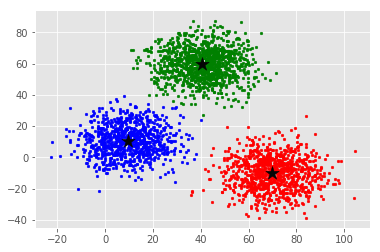

In [12]:
colors= ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')